In [1]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
mag_list = [-0.5, -0.25, 0.0, 0.25, 0.5]

# Load test_latent
with open('test_latent.pkl', 'rb') as f:
    test_latent = pickle.load(f)

# Load predict_ours
with open('predict_ours.pkl', 'rb') as f:
    predict_ours = pickle.load(f)

# Load predict_naive
with open('predict_naive.pkl', 'rb') as f:
    predict_naive = pickle.load(f)

In [3]:
mean_dt = 2.6272
t_mean = np.arange(0, 500) * mean_dt

In [9]:
# # ========== Enhanced Academic Visualization for Publication ==============

j = 0  # Using first magnetization condition for detailed analysis
true_tra = test_latent[f'mag_' + str(mag_list[j])]
pred_tra_ours = predict_ours['box_L_16' + '_' + 'mag_' + str(mag_list[j])]
pred_tra_naive = predict_naive['box_L_16' + '_' + 'mag_' + str(mag_list[j])]

true_mean = np.mean(true_tra, axis=0)
pred_mean_ours = np.mean(pred_tra_ours, axis=0)
pred_mean_naive = np.mean(pred_tra_naive, axis=0)

# Calculate statistical measures
true_std = np.std(true_tra, axis=0)
pred_std_ours = np.std(pred_tra_ours, axis=0)
pred_std_naive = np.std(pred_tra_naive, axis=0)

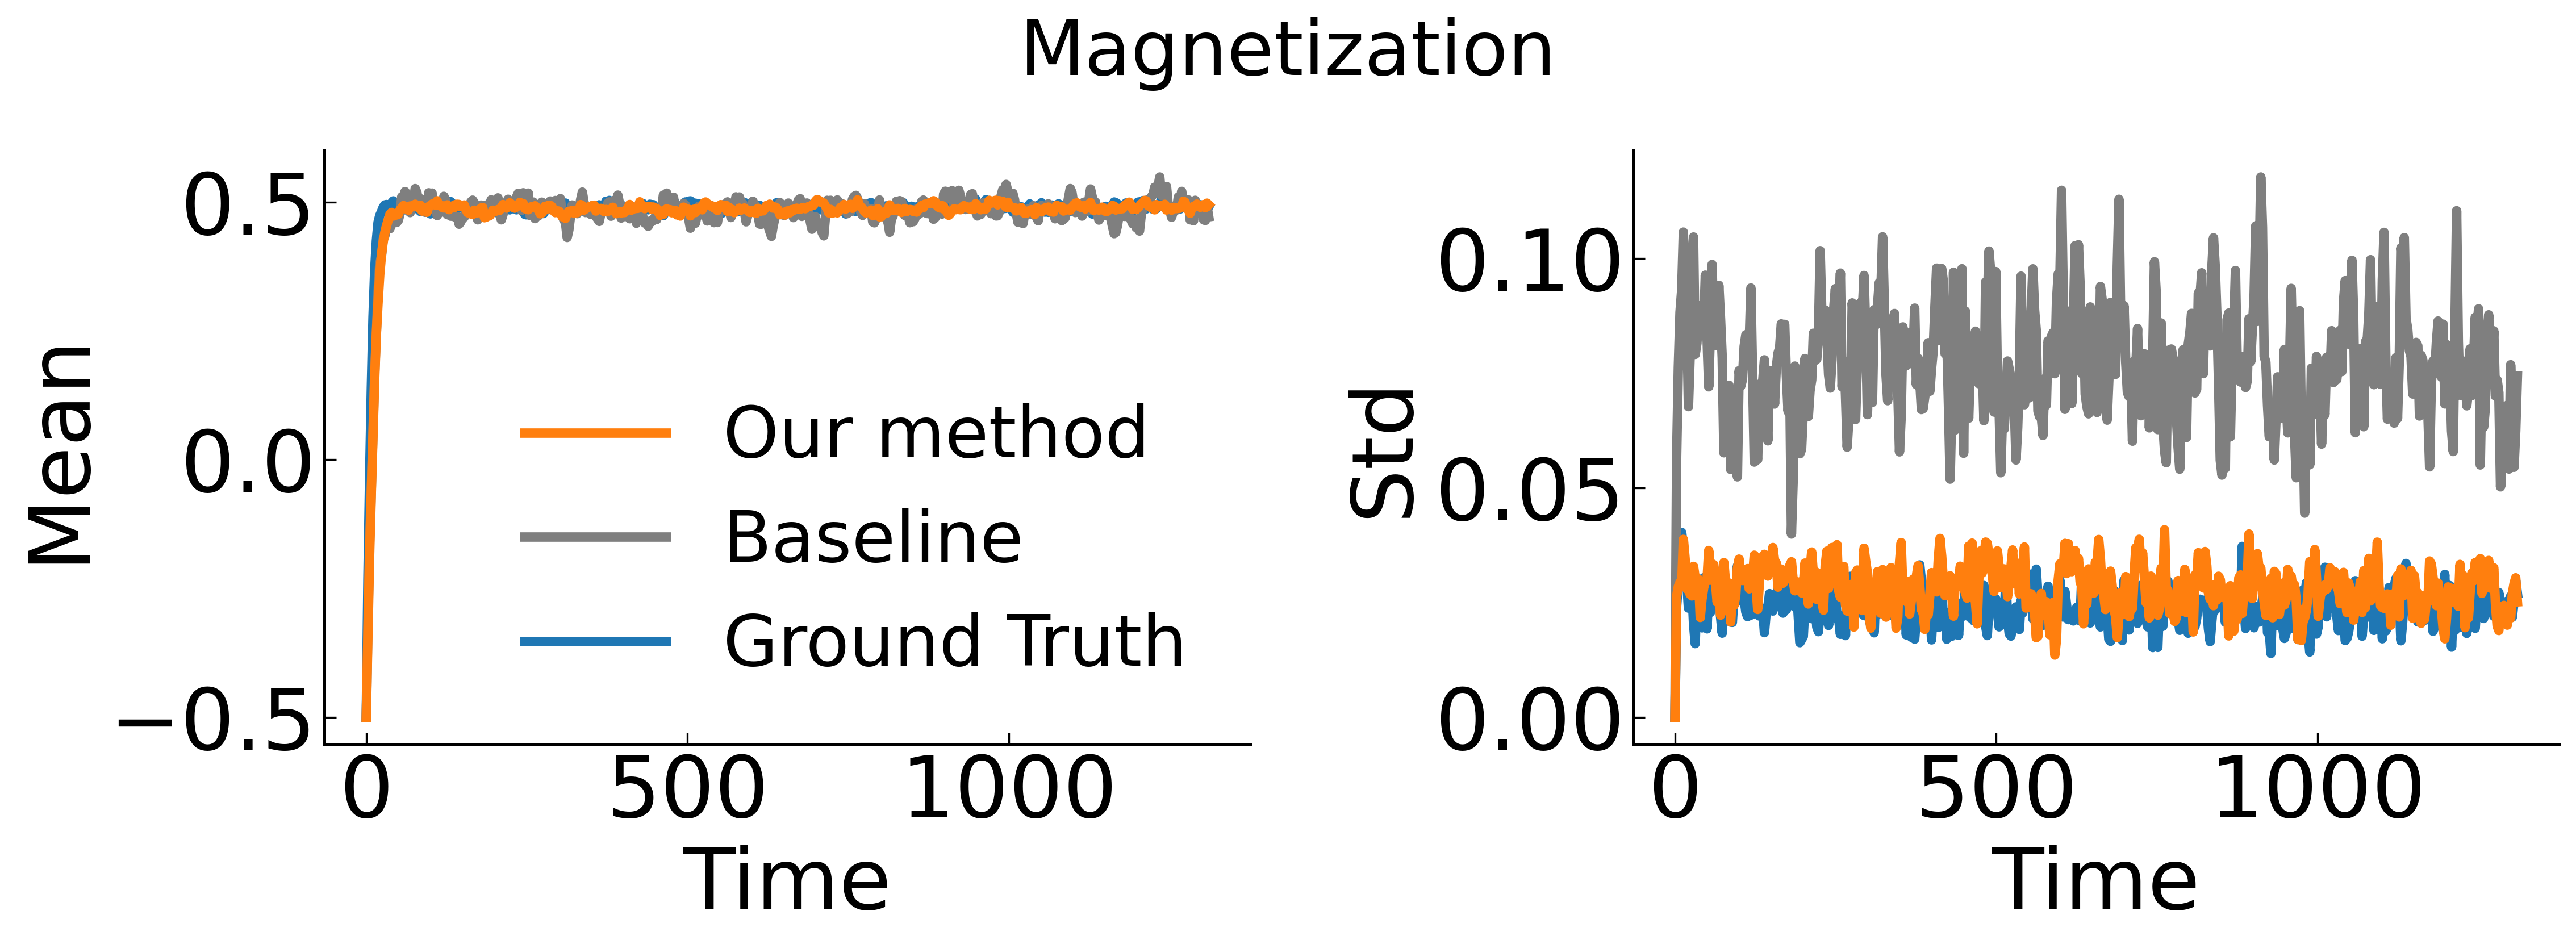

In [10]:
plt.rcParams.update({
    'font.size': 36,
    'font.family': 'sans-serif', 
    'text.usetex': False,  # Set to True if LaTeX is available
    'axes.linewidth': 1.2,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 2.5,
    'ytick.minor.size': 2.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'legend.frameon': False,
    'legend.fontsize': 30,
})

colors = {
    'true': 'tab:blue',      # Near black for ground truth (authoritative)
    'ours': 'tab:orange',      # Strong red for our method (attention-grabbing)
    'naive': 'tab:grey',     # Professional blue for baseline (standard)
}

# Create figure with academic styling
fig = plt.figure(figsize=(16, 6), facecolor='white', dpi=300)

# Individual trajectory comparisons - Dimension 1
axes1 = fig.add_subplot(1, 2, 1)
axes1.plot(t_mean, pred_mean_ours, color=colors['ours'], label='Our method', 
           linewidth=4, linestyle='-', zorder=3)
axes1.plot(t_mean, pred_mean_naive, color=colors['naive'], label='Baseline', 
           linewidth=4, linestyle='-', zorder=2)
axes1.plot(t_mean, true_mean, color=colors['true'], label='Ground Truth', 
           linewidth=4, linestyle='-', zorder=1)
axes1.legend(loc='lower right')
axes1.set_ylabel('Mean')
axes1.set_xlabel('Time')

axes2 = fig.add_subplot(1, 2, 2)
axes2.plot(t_mean, pred_std_ours, color=colors['ours'], label='Our method', 
           linewidth=4, linestyle='-', zorder=3)
axes2.plot(t_mean, pred_std_naive, color=colors['naive'], label='Baseline', 
           linewidth=4, linestyle='-', zorder=2)
axes2.plot(t_mean, true_std, color=colors['true'], label='Ground Truth', 
           linewidth=4, linestyle='-', zorder=1)
axes2.set_ylabel('Std')
axes2.set_xlabel('Time')

# Adjust layout first to leave space for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.94])  # Leave 6% space at top for title

# Add suptitle with custom positioning
plt.suptitle('Magnetization', y=0.98, fontsize=32)
plt.savefig('CW_traj_1.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('CW_traj_1.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

In [11]:
# ========== calculate error ==============
mse_ours_list = []
mae_ours_list = []
mse_naive_list = []
mae_naive_list = []
box_L = [8, 16, 32, 64]
for box_i in box_L:
    print('box_L:', box_i)
    print('mag_list:', mag_list)
    mse_ours_list_mag = []
    mae_ours_list_mag = []
    mse_naive_list_mag = []
    mae_naive_list_mag = []
    for mag_j in mag_list:
        
        true_tra = test_latent['mag_' + str(mag_j)]
        pred_tra_ours = predict_ours['box_L_' + str(box_i) + '_' + 'mag_' + str(mag_j)]
        pred_tra_naive = predict_naive['box_L_' + str(box_i) + '_' + 'mag_' + str(mag_j)]

        true_mean = np.mean(true_tra, axis=0).reshape(-1)
        pred_mean_ours = np.mean(pred_tra_ours, axis=0).reshape(-1)
        pred_mean_naive = np.mean(pred_tra_naive, axis=0).reshape(-1)

        mse_ours_loss = np.mean((pred_mean_ours - true_mean) ** 2) / np.mean(true_mean ** 2)
        mse_naive_loss = np.mean((pred_mean_naive - true_mean) ** 2) / np.mean(true_mean ** 2)
        mae_ours_loss = np.mean(np.abs(pred_mean_ours - true_mean)) / np.mean(np.abs(true_mean))
        mae_naive_loss = np.mean(np.abs(pred_mean_naive - true_mean)) / np.mean(np.abs(true_mean))

        mse_ours_loss = np.sum((pred_mean_ours - true_mean) ** 2) / np.sum(true_mean ** 2)
        mse_naive_loss = np.sum((pred_mean_naive - true_mean) ** 2) / np.sum(true_mean ** 2)
        mae_ours_loss = np.sum(np.abs(pred_mean_ours - true_mean)) / np.sum(np.abs(true_mean))
        mae_naive_loss = np.sum(np.abs(pred_mean_naive - true_mean)) / np.sum(np.abs(true_mean))

        mse_ours_list_mag.append(mse_ours_loss)
        mse_naive_list_mag.append(mse_naive_loss)
        mae_ours_list_mag.append(mae_ours_loss)
        mae_naive_list_mag.append(mae_naive_loss)

    mse_ours_list.append(np.mean(mse_ours_list_mag))
    mse_naive_list.append(np.mean(mse_naive_list_mag))
    mae_ours_list.append(np.mean(mae_ours_list_mag))
    mae_naive_list.append(np.mean(mae_naive_list_mag))

box_L: 8
mag_list: [-0.5, -0.25, 0.0, 0.25, 0.5]
box_L: 16
mag_list: [-0.5, -0.25, 0.0, 0.25, 0.5]
box_L: 32
mag_list: [-0.5, -0.25, 0.0, 0.25, 0.5]
box_L: 64
mag_list: [-0.5, -0.25, 0.0, 0.25, 0.5]


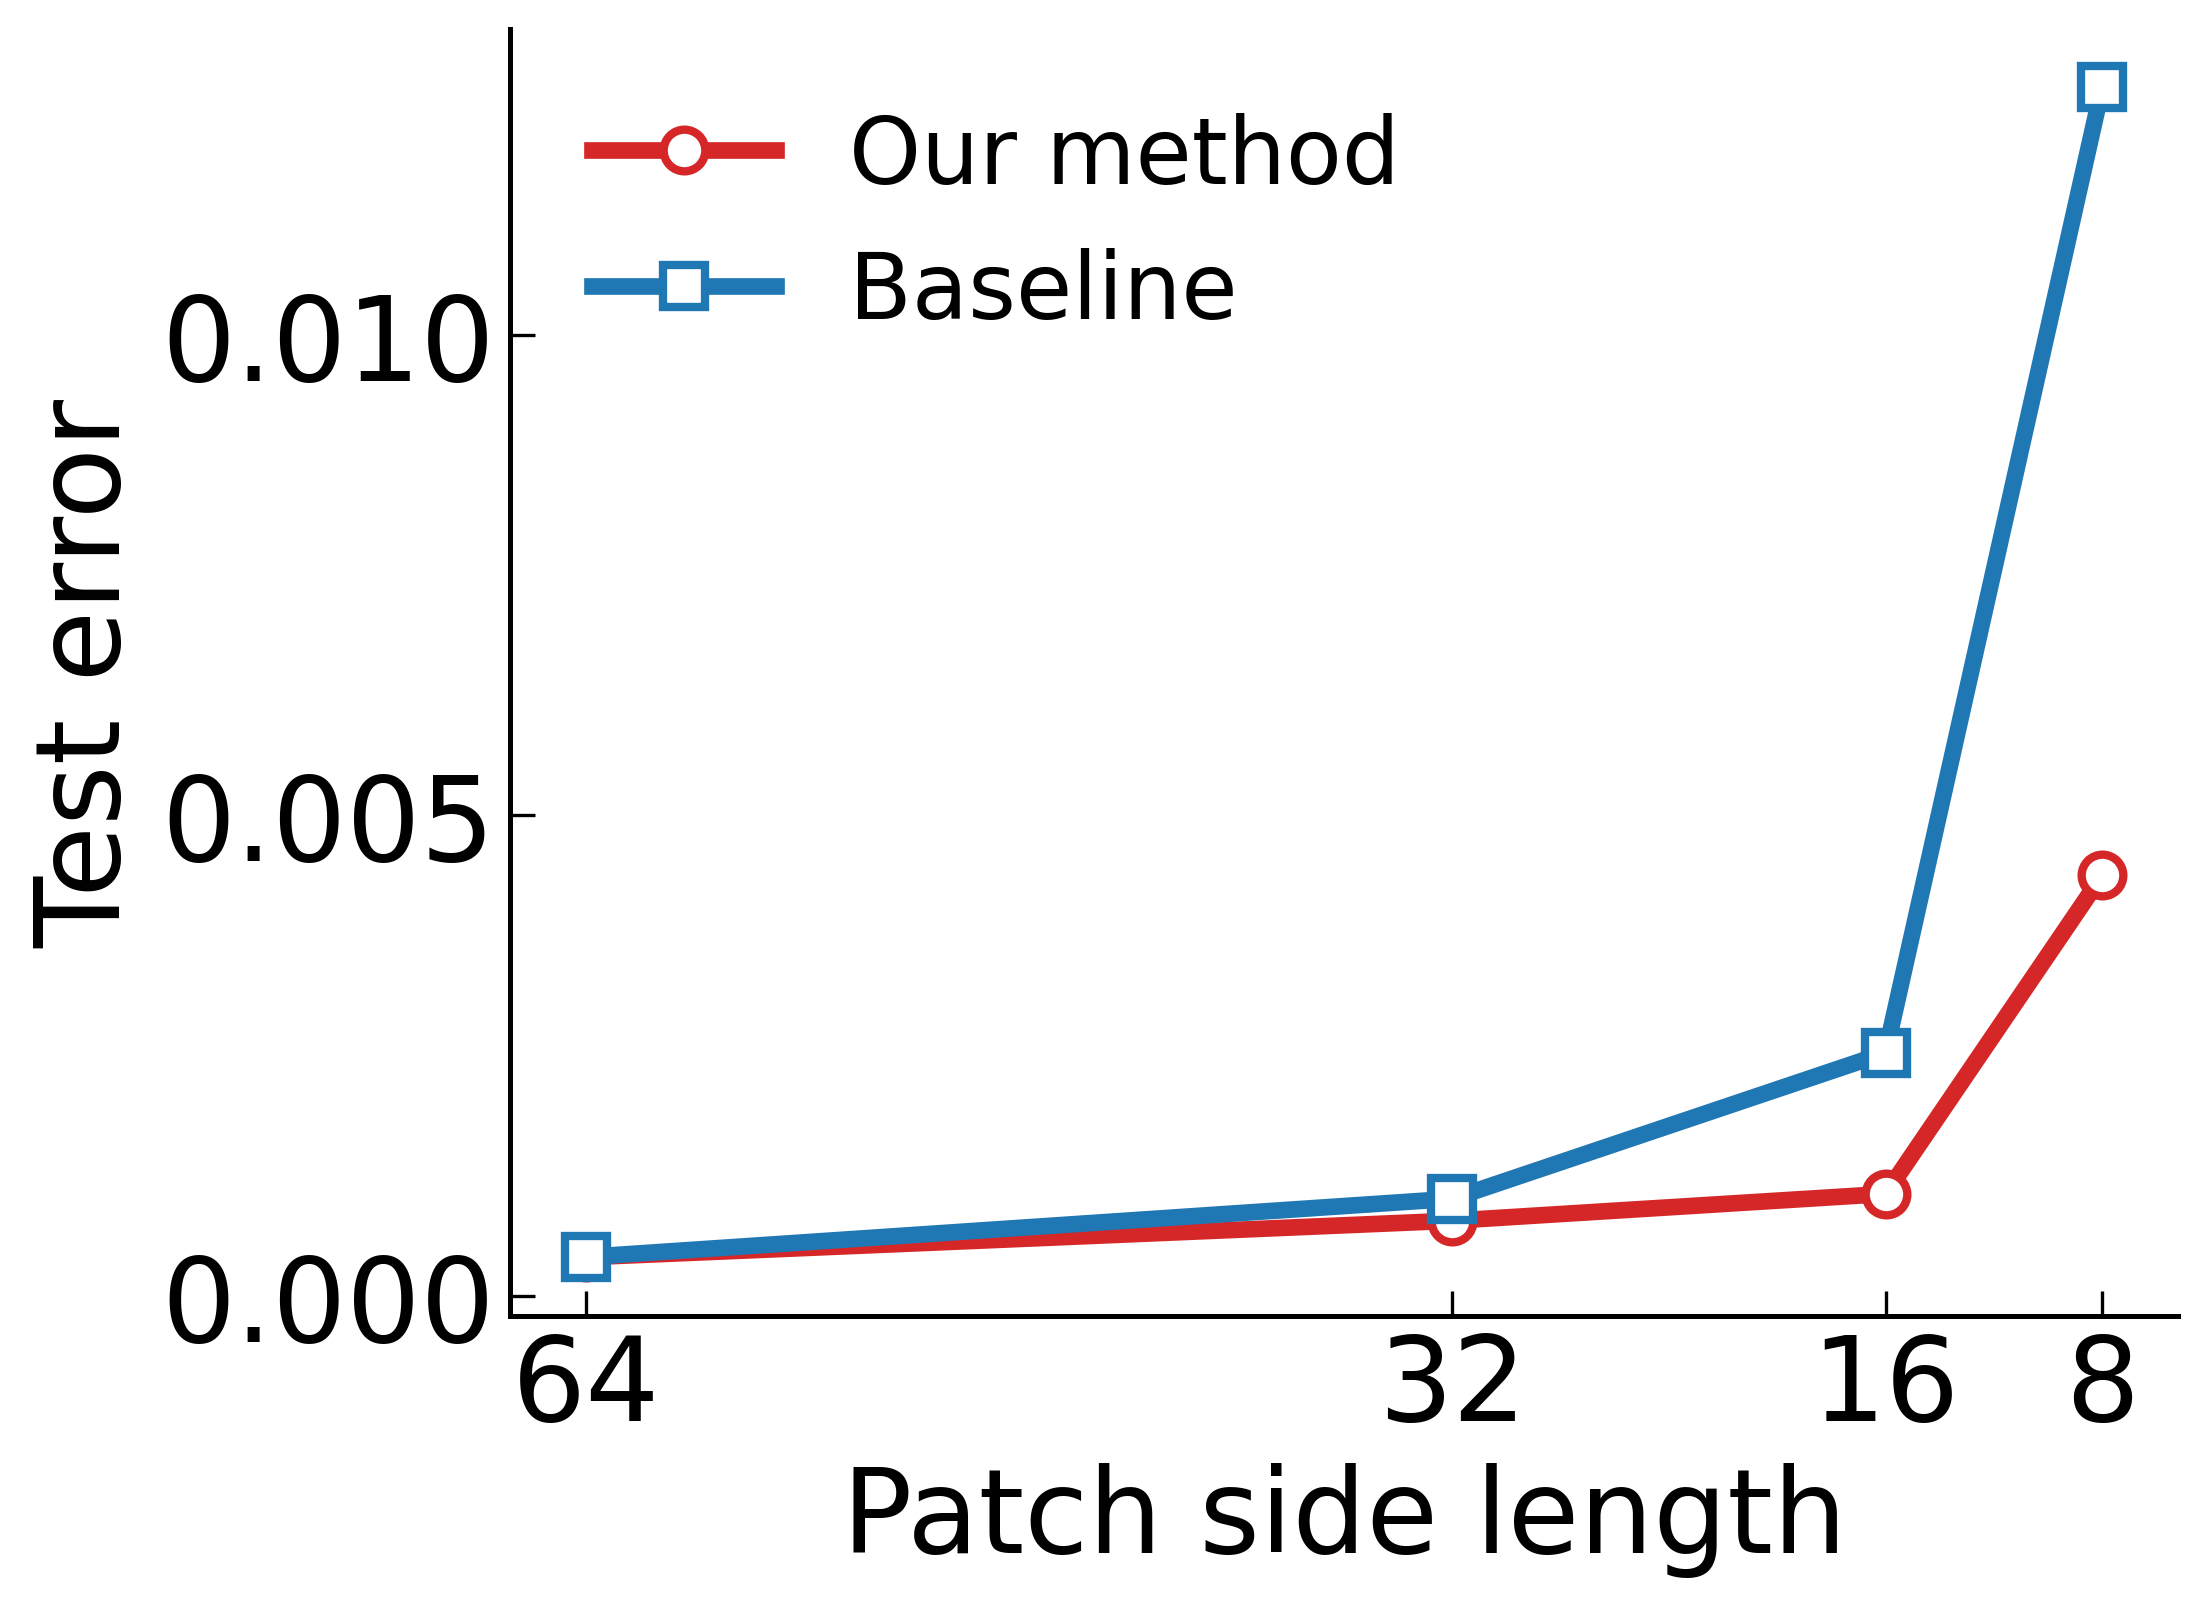

In [12]:
# ========== Enhanced Academic Visualization for Ablation Study ==============
import matplotlib.patches as mpatches

# Set up professional academic figure style
plt.rcParams.update({
    'font.size': 28,
    'font.family': 'sans-serif',
    'text.usetex': False,  # Set to True if LaTeX is available
    'axes.linewidth': 1.2,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'legend.fontsize': 22,
    'legend.frameon': False,
})

# Create figure with proper academic dimensions
fig = plt.figure(figsize=(8, 6), dpi=300, facecolor='white')
axes = fig.add_subplot(1, 1, 1)

# Define academic color scheme
colors = {
    'ours': '#D62728',      # Professional blue
    'naive': '#1F77B4',     # Contrasting orange
}

# Data preparation
x_labels = [64, 32, 16, 8]
x_positions = np.arange(len(x_labels))

# Enhanced plotting with error bars and better markers
line1 = axes.plot(x_labels, mse_ours_list[::-1], 
                  marker='o', color=colors['ours'], 
                  label='Our method', 
                  markersize=10, linewidth=4, 
                  markerfacecolor='white', markeredgewidth=2,
                  markeredgecolor=colors['ours'])

line2 = axes.plot(x_labels, mse_naive_list[::-1], 
                  marker='s', color=colors['naive'], 
                  label='Baseline', 
                  markersize=10, linewidth=4,
                  markerfacecolor='white', markeredgewidth=2,
                  markeredgecolor=colors['naive'])

# Enhanced axis labels with proper mathematical notation
axes.set_xlabel('Patch side length')
axes.set_ylabel('Test error')

# Professional title
# axes.set_title('Ablation Study: Performance vs. Spatial Resolution\n(System Size: 32³)', 
#                fontsize=16, fontweight='bold', pad=20)

# Set ticks and formatting
axes.set_xticks(x_labels)
axes.set_xticklabels([f'{x}' for x in x_labels])
axes.tick_params(axis='y')
axes.invert_xaxis()

legend = axes.legend(loc='upper left')

# Tight layout for proper spacing
plt.tight_layout()
plt.savefig('CW.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('CW.pdf', bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Display the plot
plt.show()


In [13]:
# ========== Save data to CSV file ==============
import pandas as pd

# Prepare data for saving
x_labels = [64, 32, 16, 8]
data_to_save = {
    'patch_side_length': x_labels,
    'mse_ours': mse_ours_list[::-1],  # Reverse to match x_labels order
    'mse_naive': mse_naive_list[::-1],  # Reverse to match x_labels order
}

# Create DataFrame
df = pd.DataFrame(data_to_save)

# Save to CSV
csv_filename = 'curie_weiss_results.csv'
df.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

# Display the saved data
print("\nSaved data:")
print(df)


Data saved to curie_weiss_results.csv

Saved data:
   patch_side_length  mse_ours  mse_naive
0                 64  0.000405   0.000408
1                 32  0.000785   0.001014
2                 16  0.001064   0.002531
3                  8  0.004377   0.012570
